## Exploratory Data Analysis (EDA)

In this lesson, we'll get a taste of what matplotlib can do by using it to perform a bit of Exploratory Data Analysis on a well known data set. 

[Exploratory Data Analysis (EDA)][1] is an approach to analyzing data that focuses on summarizing the main characteristics of a data set. One of EDA's major proponents, the venerable statistician [John Tukey][2], was a major force behind the acceptance of EDA into every modern day data scientist's toolbox, and his efforts to popularize the practice encouraged the development of statistical computing packages such as the [S][3] and [R][4] programming languages. The matplotlib library can itself be seen as being directly influenced by the work of Tukey. 

[1]: https://en.wikipedia.org/wiki/Exploratory_data_analysis
[2]: https://en.wikipedia.org/wiki/John_Tukey
[3]: https://en.wikipedia.org/wiki/S_(programming_language)
[4]: https://www.r-project.org/

<figure>
  <img src="./images/John_Tukey.jpg" alt="John Tukey" width="268" height="326">
  <figcaption style="text-align:center;padding-top:10px">By Source, <a href="//en.wikipedia.org/wiki/File:John_Tukey.jpg" title="<a href=&quot;//en.wikipedia.org/wiki/Wikipedia:Non-free_use_rationale_guideline&quot; title=&quot;Wikipedia:Non-free use rationale guideline&quot;>Fair use</a> of copyrighted material in the context of <a href=&quot;//en.wikipedia.org/wiki/John_Tukey&quot; title=&quot;John Tukey&quot;>John Tukey</a>">Fair use</a>, https://en.wikipedia.org/w/index.php?curid=17099473</figcaption>
</figure>

Exploratory data analysis can encompass many different techniques, but key amongst them is the act of visualizing the data set in question, and this is where matplotlib comes in. The first step, however, before we can do anything, is to import the matplotlib library.

<!---
In this lesson, we'll get a sneak peak into the power that matplotlib possesses by using the library to perform a few simple visualizations on a well known data set to see what we can learn about the data.

## Interacting With matplotlib

The matplotlib library has exactly three different interfaces to choose from when deciding how you want to interact with the library. We'll go over each in a bit more detail in a later lesson, but for this lesson, we'll be using the `pyplot` interface, since it's the recommended way for doing interactive plotting with matplotlib. Also, since this lesson is really just meant to showcase some of the things you can expect to learn in this course, rather than being instructional, I wouldn't get too worried if you don't understand everything that we do in this lesson; I promise that by the end of this course, you'll have everything you need to understand everything we'll be doing in this lesson, and more so. With that in mind, let's get started...

--->

## Importing the Libraries

The matplotlib library has exactly three different interfaces to choose from when deciding how you want to interact with the library. We'll go over each in a bit more detail in a later lesson, but for this lesson, we'll be using the `pyplot` interface, since it's the recommended way for doing interactive plotting with matplotlib. Also, since this lesson is really just meant to showcase some of the things you can expect to learn in this course, rather than being instructional, I wouldn't get too worried if you don't understand everything that we do in this lesson; I promise that by the end of this course, you'll have everything you need to understand every last detail of what we'll be doing in this lesson, and more so. With that in mind, let's get started...

The `import` line below (line 2) is the standard way to import the `pyplot` module, and you'll generally see it imported just like this everywhere it's used. Incidentally, you'll see that pretty much every module that you regularly use from matplotlib, and the rest of the python scientific stack for that matter, generally have a commonly accepted way in which they are imported, and stickler for the rules that I am, I will endeavor to always use the standard way throughout this course---in order to foster good coding practices in all of us.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## The Census Income Data Set

Now that we have our notebook properly set up to work with matplotlib, it's time to pull in some data and get our hands dirty.

The University of California at Irvine maintains a repository of over 300 real world data sets for use in testing machine learning algorithms. This repository is a fantastic resource since it allows us to play around with a relatively small, real world dataset while ignoring all of the cumbersome pre-processing steps you'd normally have to perform before getting a chance to explore the data.

In this quick example of matplotlib in action, we'll be using the ["Census Income"][1] data set, also known as the ["Adult"][2] data set. The stated purpose of this data set is to predict whether or not an individual makes more than \$50k a year based on data gathered during the 1994 Census. While we won't be using this data set to test a predictive algorithm, we can still make use of the data to find some interesting insights. 

[1]: http://archive.ics.uci.edu/ml/datasets/Census+Income
[2]: http://archive.ics.uci.edu/ml/datasets/Adult

The first step is to grab the data from the [UCI Machine Learning Repository][3]. To do that, we'll take advantage of python's "batteries included" philosophy and make use of a few modules from the standard library to get this bit of our work done. In the code below, we use the [`urllib2`][4] module to download the data set from the repository, the [`csv`][5] module to read the data in, and [`namedtuples`][6] from the `collections` module to transform that data into a format that's easy to work with. Incidentally, I've saved the data file locally, so if for some reason you find yourself in a situation where you don't have access to a fast network connection, you can simply replace the download code on lines 25 and 26 below with some code to pull the data in from the `./data/adult_data.csv` file instead.

[3]: http://archive.ics.uci.edu/ml/index.html
[4]: https://docs.python.org/2/library/urllib2.html
[5]: https://docs.python.org/2/library/csv.html
[6]: https://docs.python.org/2/library/collections.html#collections.namedtuple

In [11]:
import csv
import urllib2
from collections import namedtuple


# Create a namedtuple constructor for each record in the Census data
fields = ('age', 
          'workclass', 
          'fnlwgt', 
          'education', 
          'education_num', 
          'marital_status', 
          'occupation', 
          'relationship', 
          'race', 
          'sex', 
          'capital_gain', 
          'capital_loss', 
          'hours_per_week', 
          'native_country', 
          'target')
CensusRecord = namedtuple('CensusRecord', fields)

# Download and read in the data from the UCI Machine Learning Repository
response = urllib2.urlopen('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
adult_data_csv = response.read().strip()

# Convert each record into a format that's easier to work with (i.e.,
# wrap each record in the namedtuple that we created).
data = []
for row in csv.reader(adult_data_csv.splitlines()):
    data.append(CensusRecord(
        age              = int(row[0]),
        workclass        = row[1].strip(),
        fnlwgt           = float(row[2].strip()),
        education        = row[3].strip(),
        education_num    = int(row[4]),
        marital_status   = row[5].strip(),
        occupation       = row[6].strip(),
        relationship     = row[7].strip(),
        race             = row[7].strip(),
        sex              = row[9].strip(),
        capital_gain     = int(row[10]),
        capital_loss     = int(row[11]),
        hours_per_week   = int(row[12]),
        native_country   = row[13].strip(),
        target           = row[14].strip()))

In [3]:
data

[CensusRecord(age=39, workclass='State-gov', fnlwgt=77516.0, education='Bachelors', education_num=13, marital_status='Never-married', occupation='Adm-clerical', relationship='Not-in-family', race='Not-in-family', sex='Male', capital_gain=2174, capital_loss=0, hours_per_week=40, native_country='United-States', target='<=50K'),
 CensusRecord(age=50, workclass='Self-emp-not-inc', fnlwgt=83311.0, education='Bachelors', education_num=13, marital_status='Married-civ-spouse', occupation='Exec-managerial', relationship='Husband', race='Husband', sex='Male', capital_gain=0, capital_loss=0, hours_per_week=13, native_country='United-States', target='<=50K'),
 CensusRecord(age=38, workclass='Private', fnlwgt=215646.0, education='HS-grad', education_num=9, marital_status='Divorced', occupation='Handlers-cleaners', relationship='Not-in-family', race='Not-in-family', sex='Male', capital_gain=0, capital_loss=0, hours_per_week=40, native_country='United-States', target='<=50K'),
 CensusRecord(age=53, w

## Exploring the Data Set

Now that we've read the data in and have it in a format that we can easily work with, we're ready to explore our data set a bit. 

### Histograms and Bar Charts

A [histogram][1] is a fantastic visualization for getting a feel for the distribution of your data set. Creating a histogram with matplotlib is relatively easy, you simply call the [`pyplot.hist`][2] function and pass in a list of values, and matplotlib will take care of calculating the frequency distribution and plotting the data for you. We could do that here, "but a histogram is really meant to be used with CONTINUOUS data", and in our case, we're dealing with discrete values, so a [bar chart is really a more fitting tool][3] for this particular situation, and we can dress it up to look just like a typical matplotlib histogram, so that's what we'll do here.

[1]: https://en.wikipedia.org/wiki/Histogram
[2]: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
[3]: http://www.forbes.com/sites/naomirobbins/2012/01/04/a-histogram-is-not-a-bar-chart/#570a8dda28af

Let's take a first look at our data by creating a histogram using the [`pyplot.bar`][4] function. Since we aren't using the `pyplot.hist` function, we'll have to do the frequency count ourselves, but luckily, the python standard library provides a collection class that will do that for us. 

[4]: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar

The code below, uses the [`collections.Counter`][5] class to create a dictionary-like object whose keys will be the education level from our data set, and values the number of times we see each of those levels occurring in the data. Then, we simply plot the keys and values in our `Counter` object using the `pyplot.bar` function to get a simple "histogram".

[5]: https://docs.python.org/2/library/collections.html#collections.Counter

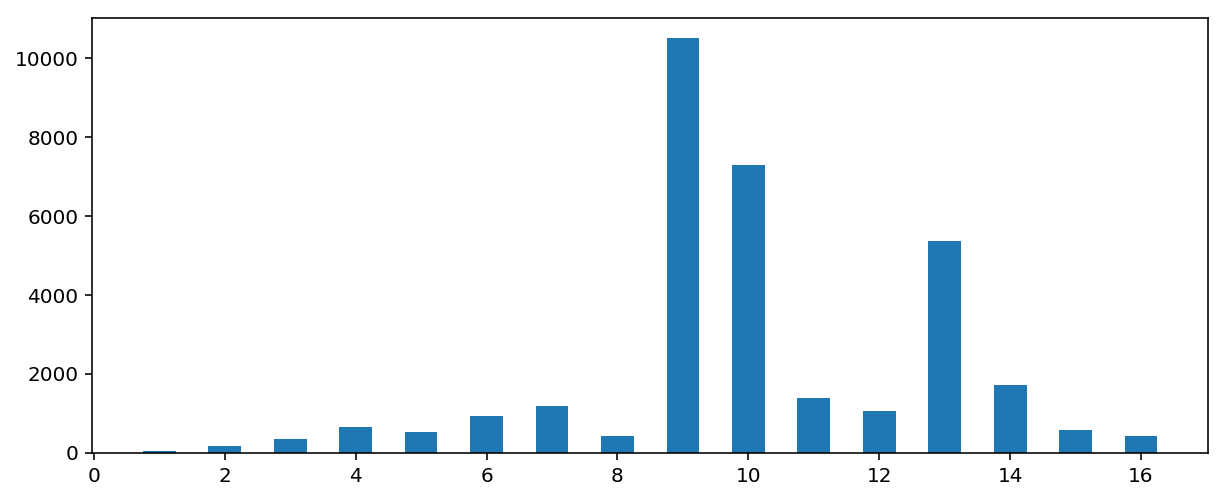

In [17]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate the frequency count for each education level.
freqs = Counter(r.education_num for r in data)
# Draw the bar chart/histogram
plt.figure(figsize=(10, 4))
plt.bar(freqs.keys(), freqs.values(), width=0.5);

The result is the chart above, and it's showing us a couple of interesting spikes in the number of people with a particular level of education. These spikes occurred around levels 9, 10, and 13. While this is interesting, it'd be better if the education levels actually meant something to us. Fortunately, the census data has another feature called `education` that contains the human readable counterpart to the education level. So, all we need to do is replace the education levels along the x-axis with their corresponding names from the `education` field. 

To match up the human readable education levels with their numerical equivalent, we'll need to first figure out the order in which the names should be displayed along the x-axis. We can do that by matching each name up to its corresponding education level, and sorting the names based on the level. The easiest way to do that is to just change the keys in our `Counter` object from a scalar value, the education level, to a tuple containing both the education level and the human-readable name of that level---e.g., `(9, 'HS-Grad')`. Then, we can simply sort our list of keys by the first element in the tuple, and extract the name (i.e., the second element in the tuple) to get a list of names ordered according to their education level.

Once we have our list of ordered names, we can recreate the histogram from the last section and replace the tick marks along the x-axis with those names using the `pyplot.xticks` function.

In [21]:
from collections import Counter

# Calculate the frequency count for each education level. Our 
# keys in the Counter object will be a tuple of the form 
# (number, name) so it will be possible to sort the keys.
freqs = Counter((r.education_num, r.education) for r in data)

print freqs

print sorted(freqs.keys())


# Create a list of names sorted by the education level number
names = [name for _, name in sorted(freqs.keys())]
# Create a list of counts in the same order as the names
counts = [freqs[key] for key in sorted(freqs.keys())]
# An array containing the x coordinates of the left sides of the bars in the chart
left = range(len(names))


print names

print counts

print left

Counter({(9, 'HS-grad'): 10501, (10, 'Some-college'): 7291, (13, 'Bachelors'): 5355, (14, 'Masters'): 1723, (11, 'Assoc-voc'): 1382, (7, '11th'): 1175, (12, 'Assoc-acdm'): 1067, (6, '10th'): 933, (4, '7th-8th'): 646, (15, 'Prof-school'): 576, (5, '9th'): 514, (8, '12th'): 433, (16, 'Doctorate'): 413, (3, '5th-6th'): 333, (2, '1st-4th'): 168, (1, 'Preschool'): 51})
[(1, 'Preschool'), (2, '1st-4th'), (3, '5th-6th'), (4, '7th-8th'), (5, '9th'), (6, '10th'), (7, '11th'), (8, '12th'), (9, 'HS-grad'), (10, 'Some-college'), (11, 'Assoc-voc'), (12, 'Assoc-acdm'), (13, 'Bachelors'), (14, 'Masters'), (15, 'Prof-school'), (16, 'Doctorate')]
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
[51, 168, 333, 646, 514, 933, 1175, 433, 10501, 7291, 1382, 1067, 5355, 1723, 576, 413]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


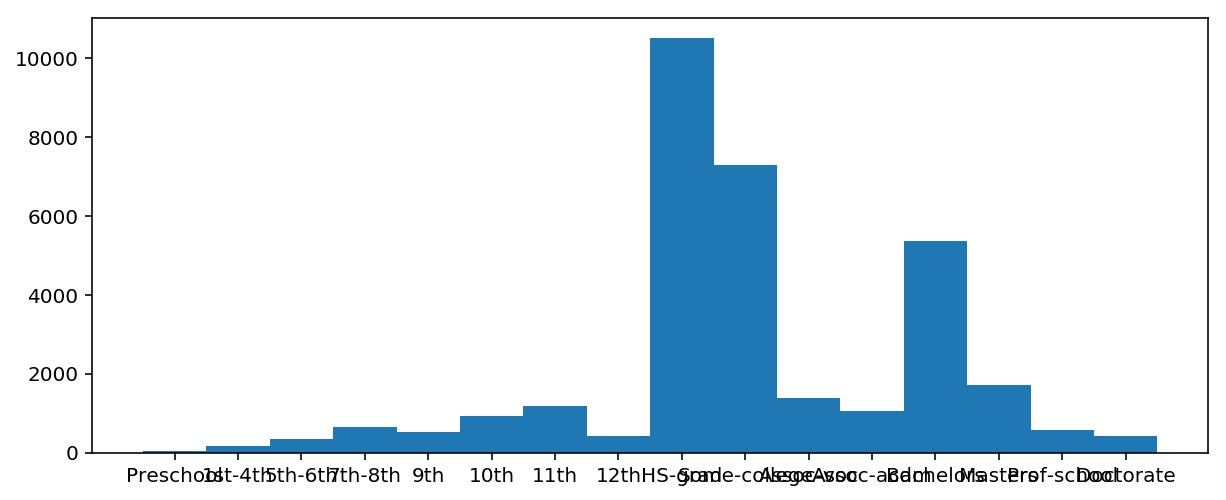

In [31]:
from collections import Counter

# Calculate the frequency count for each education level. Our 
# keys in the Counter object will be a tuple of the form 
# (number, name) so it will be possible to sort the keys.
freqs = Counter((r.education_num, r.education) for r in data)
# Create a list of names sorted by the education level number
names = [name for _, name in sorted(freqs.keys())]
# Create a list of counts in the same order as the names
counts = [freqs[key] for key in sorted(freqs.keys())]
# An array containing the x coordinates of the left sides of the bars in the chart
left = range(len(names))


# Draw the bar chart/histogram
plt.figure(figsize=(10, 4))
# Plot the counts at the given x
plt.bar(left, counts, width=1)
# Change the x-axis ticks to the education level name. To make it
# easier to read, we rotate the labels 90 degrees and move them to
# the center of the bar by adding 0.5 to each value in the left 
# array (we chose 0.5 because we set the width of each bar to 1 earlier).
plt.xticks(left, names);

Our chart now shows us the information we want, but unfortunately, the labels along the x-axis are impossible to read in many cases. Fortunately, there's an easy fix for that. 

First, we need to rotate the names by 90 degrees using the `rotation` parameter of the `pyplot.xticks` function. We could leave it at that, but the labels would look nicer if they were in the center of each bar in our graph, instead of being lined up with the left side of the bar. Since we set the bar width to 1 earlier, we can simply add 0.5 to each value in the `left` array before passing it into the `pyplot.bar` function. That will move each label to the right by half the width of the bar which will put each label right in the middle of its corresponding bar.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


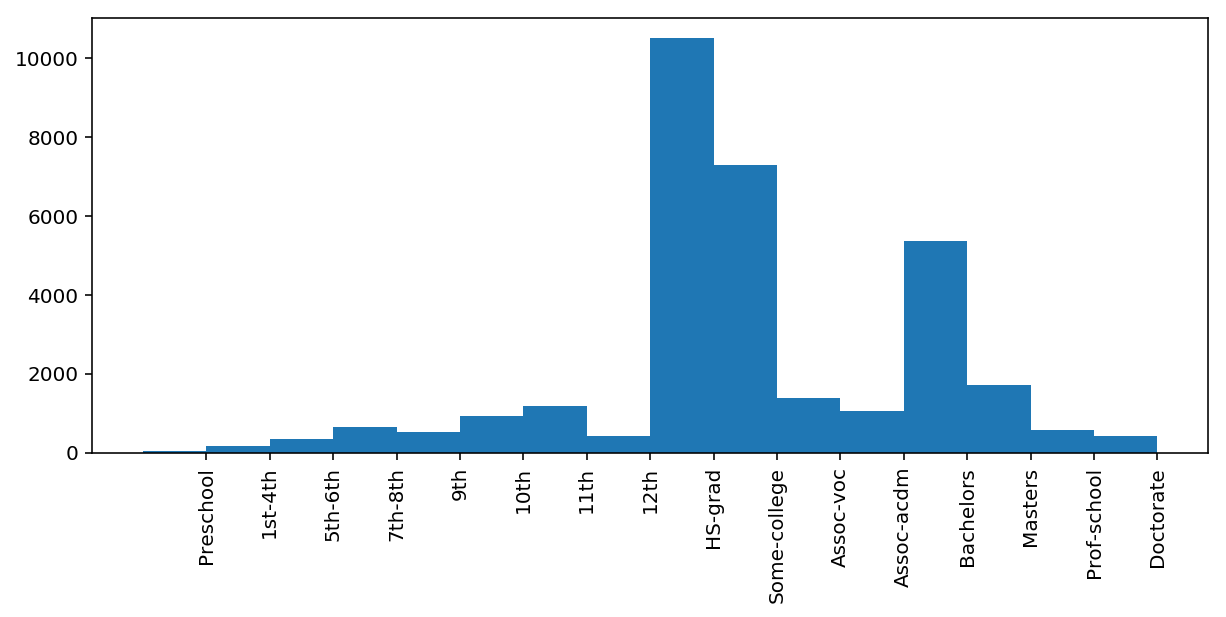

In [32]:
import numpy as np

# Calculate the frequency count for each education level. Our 
# keys in the Counter object will be a tuple of the form 
# (number, name) so it will be possible to sort the keys.
freqs = Counter((r.education_num, r.education) for r in data)
# Create a list of names sorted by the education level number
names = [name for _, name in sorted(freqs.keys())]
# Create a list of counts in the same order as the names
counts = [freqs[key] for key in sorted(freqs.keys())]
# An array containing the x coordinates of the left sides of the bars in the chart
left = np.arange(len(names))

print left

# Draw the bar chart/histogram
plt.figure(figsize=(10, 4))
# Plot the counts at the given x
plt.bar(left, counts, width=1)
# Change the x-axis ticks to the education level name. To make it
# easier to read, we rotate the labels 90 degrees and move them to
# the center of the bar by adding 0.5 to each value in the left 
# array (we chose 0.5 because we set the width of each bar to 1 earlier).
plt.xticks(left + 0.5, names, rotation=90);

Now that our chart is complete, we can finally see that the majority of participants in the 1994 Census, had at least a high school education, followed by some college, and then a Bachelor's degree. The other interesting tidbit that we can gather from this simple visualization is just how much more popular a four year college is than a traditional trade school, or a two year associates degree. In many countries, apprenticeships are seen as a popular route for getting the education and training one needs for a secure future, but here in the US, it would seem that we still highly favor the four year institution over these other options.

### Scatter Plots

The next bit of data we're going to investigate are the number of hours worked per week. If we use a [scatter plot][1] we can plot two different variables in our data set against one another. Doing so allows us to visually see the relationship, should one exist, between the two variables. In our example below, we're going to plot the average number of hours worked per week for each level of education. 

[1]: https://en.wikipedia.org/wiki/Scatter_plot

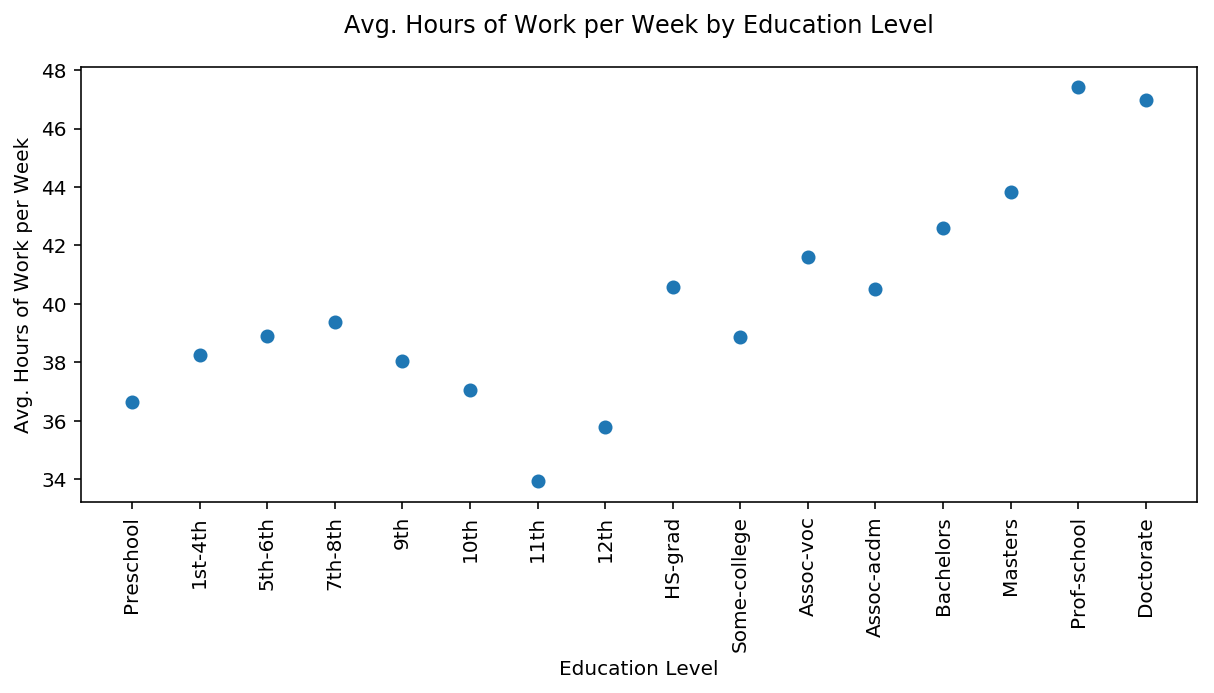

In [42]:
# Create a list of the average hours/week worked order by education level
avgs = []
for name in names:
    # Get the total number of hours/week for the current education level
    hours_per_week = [r.hours_per_week for r in data if r.education == name]
    avgs.append(np.average(hours_per_week))

# Create a list of x values
xs = np.arange(1, len(names) + 1)

# Create a scatter plot of the data
plt.figure(figsize=(10, 4))
plt.scatter(xs, avgs)

# Tighten the graph up by reducing the margins on the x-axis
plt.margins(x=0.05)

# Adding the education level labels to the graph
plt.xticks(xs, names, rotation=90)

# Add a title and labels to each of the axes
plt.ylabel('Avg. Hours of Work per Week');
plt.xlabel('Education Level')
plt.title('Avg. Hours of Work per Week by Education Level', y=1.05);

Our scatter plot above seems to show a very distinct positive correlation between the number of hours worked per week on average and the highest level of education that a person has attained. We do see a dip in the number of hours worked if the person dropped out of school after the 8th grade, but before finishing high school, but aside from that rather strange dip in the data, the overall shape suggests a positive relationship between the two variables. 

We can go one step further though and verify our intuition by performing a [simple linear regression][1] on the data, and drawing the line that it produces onto our graph. If you're not familiar with linear regressions, it's actually a fairly easy concept to grasp. Essentially, you're trying to find a line that fits the data in the best possible way. So, imagine you had the scatter plot above on a piece of graph paper, and you took a ruler and drew a line through that scatter plot in such a way that the sum of the distances between your line and every point in the data set was as small as possible. The reason for doing this is two fold: first, the line we produce gives us a fairly intuitive view into the relationship of the variables in our data, and second, it gives us an equation that we can use to roughly predict the value of the dependent variable, the variable on the y-axis, given a value for the independent variable.

[1]: https://en.wikipedia.org/wiki/Simple_linear_regression

Since matplotlib is dependent on the [NumPy][2] library, we already have everything installed that we need to run a linear regression on our data set. To do so, we simply call the [`numpy.polyfit`][3] function and pass in our data. The `polyfit` function takes two arrays---x values in the first, and y values in the second---and the degree of the equation that we're trying to fit, and returns the slope and y-intercept for the best fit line. The [degree of an equation][4] is simply the largest exponent in that equation, and since we are fitting a [linear equation][5], our largest exponent, and hence our degree, will be 1. Since we already have a list of x values, all we have to do then, is create a list of y values by multiplying each x value in our list by the slope of our line and adding the y-intercept to get the corresponding y value.

[2]: http://www.numpy.org/
[3]: http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
[4]: https://en.wikipedia.org/wiki/Degree_of_a_polynomial
[5]: https://en.wikipedia.org/wiki/Linear_equation

Now, let's redraw our scatter plot from above, and add two more lines of code (31 and 32) to our previous example: the first will perform the linear regression, and the second will plot the resultant line.

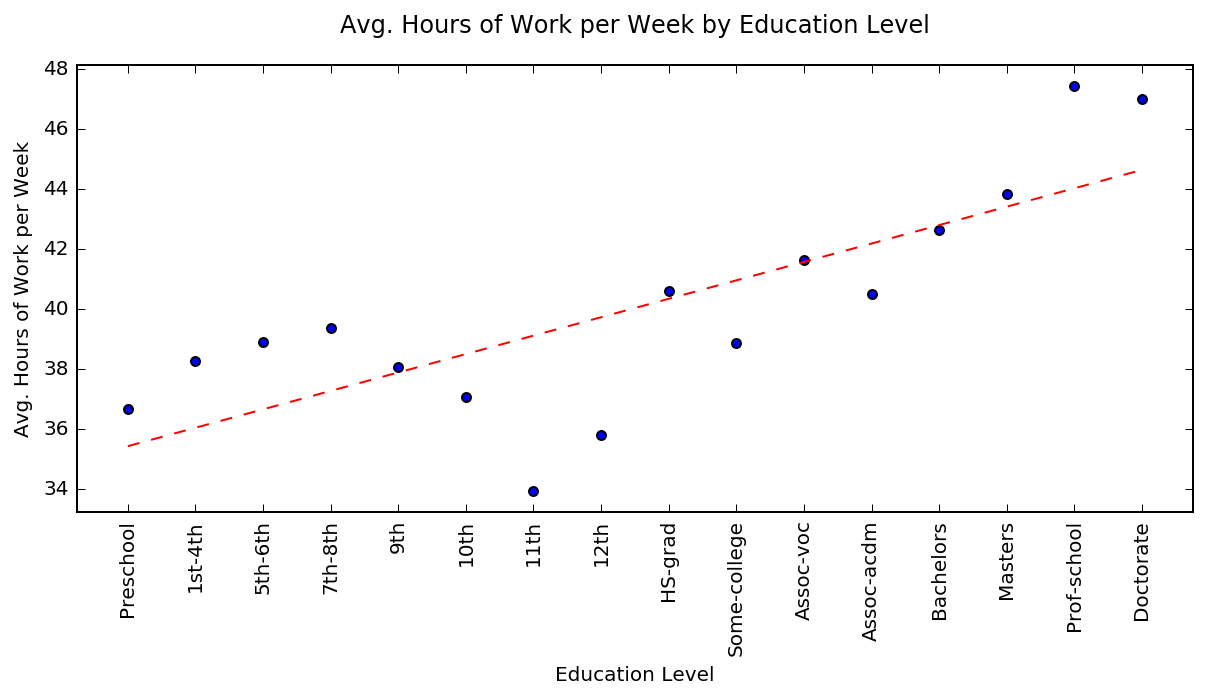

In [20]:
# Create a list of the average hours/week worked order by education level
avgs = []
for name in names:
    # Get the total number of hours/week for the current education level
    hours_per_week = [r.hours_per_week for r in data if r.education == name]
    avgs.append(np.average(hours_per_week))

# Create a list of x values
xs = np.arange(1, len(names) + 1)

# Create a scatter plot of the data
plt.figure(figsize=(10, 4))
plt.scatter(xs, avgs)

# Adding the education level labels to the graph
plt.xticks(xs, names, rotation=90)

# Tighten the graph up by reducing the margins on the x-axis
plt.margins(x=0.05)

# Add a title and labels to each of the axes
plt.ylabel('Avg. Hours of Work per Week')
plt.xlabel('Education Level')
plt.title('Avg. Hours of Work per Week by Education Level', y=1.05)

# Plot a linear regression line to show the trend in the data. 
# The ployfit function takes the x and y data and a degree which
# is just the largest exponent in the polynomial function we are
# trying to fit. Since we are fitting a simple line, the highest
# exponent is just 1, so we pass that in for the degree.
m, b = np.polyfit(xs, avgs, 1)
plt.plot(xs, m*xs+b, 'r--');

With the best fit line drawn on our scatter plot, we can definitely see a positive trend in the data. So, as it stands now, it would appear that the more education you have, the more you work, on average. The question then becomes, is this true because, as your level of education increases, so too does the availability of work? Or, is it because a higher level of education is indicative of a "workaholic" personality, and so individuals with higher levels of education just tend to work more? Or, is it due to some other factor that we haven't yet considered?

The key here is that visualizing our data has led us to ask new questions and to form new hypotheses. This, in turn, could lead to further data collection and experimentation. The whole cycle is a giant feedback loop, where data exploration feeds inquiry and further insight. It's easy to see why this was one of the main reasons that John Tukey encouraged statisticians to participate in the practice of Exploratory Data Analysis.

## Conclusion

In this lesson, we got our first peak at just how useful matplotlib can be, and in the process, we learned a little bit about a technique, popularized by the famous statistician John Tukey, called Exploratory Data Analysis. Along the way, we saw just how useful visualizing our data can be with respect to uncovering new questions and new ways of thinking about our data. We also saw how, even though our first attempt at visualizing data may not be exactly what we want, matplotlib gets us most of the way to a proper visualization right out of the box, and with just a little tweaking, it's possible to take the initial result and turn it into the perfect visualization. 

I hope this lesson has served to whet your appetite a bit for what's to come in future lessons. It is my hope, that by the end of this course, you will be properly equipped to interact with your data the way we just did in this lesson.